<a href="https://colab.research.google.com/github/Maxie503/PWSKILL-Learnings/blob/main/Class_327_InceptionNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [41]:
def inception_block(x, filters,name):
  tower1 = Conv2D(filters[0], kernel_size=(1,1), padding='same',activation='relu',name=name+'tower1')(x)
  tower1 = Conv2D(filters[1], kernel_size=(3,3), padding='same',activation='relu',name=name+'tower1-2')(tower1)

  tower2 = Conv2D(filters[2], kernel_size=(1,1), padding='same',activation='relu',name=name+'tower2')(x)
  tower2 = Conv2D(filters[3], kernel_size=(5,5), padding='same',activation='relu',name=name+'tower2-1')(tower2)

  tower3 = MaxPooling2D((3,3), strides=(1,1), padding='same',name=name+'tower3')(x)
  tower3 = Conv2D(filters[4], kernel_size=(3,3), padding='same',activation='relu',name=name+'tower3-1')(tower3)

  output = concatenate([tower1, tower2, tower3], axis=-1)
  return output


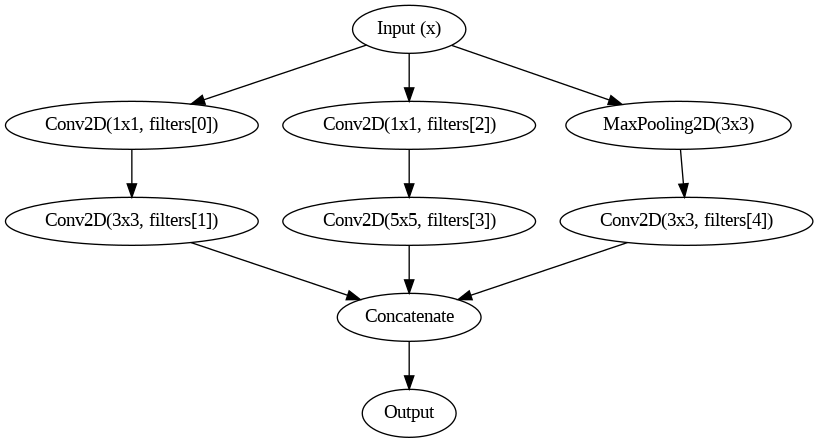

In [42]:
def inception(shape, nclasses):
  input = Input(shape)

  x= Conv2D(64,(3,3), padding='same',activation='relu',name='I1')(input)
  x = MaxPooling2D((2,2),name='I2')(x)

  x= inception_block(x, filters=[64, 96, 128, 16, 32],name='I3')
  x= inception_block(x, filters=[128, 128, 192, 32, 96],name='I4')
  x= MaxPooling2D((2,2),name='I5')(x)


  x = inception_block(x, filters=[192, 96, 208, 16, 48],name='I6')
  x = inception_block(x, filters=[160, 112, 224, 24, 64],name='I7')
  x = inception_block(x, filters=[128, 128, 256, 24, 64],name='I8')
  x = inception_block(x, filters=[112, 144, 288, 32, 64],name='I9')
  x = MaxPooling2D((2, 2),name='I10')(x)


  x = inception_block(x, filters=[256, 160, 320, 32, 128],name='I11')
  x = inception_block(x, filters=[256, 160, 320, 32, 128],name='I12')
  x = inception_block(x, filters=[384, 192, 384, 48, 128],name='I13')

  x = AveragePooling2D((4, 4),name='I14')(x)
  x = Flatten(name='I15')(x)

  output = Dense(nclasses , activation='softmax',name='I16')(x)

  model = Model (input, output)
  return model



In [43]:
m1 = inception((224,224,3), nclasses=17)
m1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
m1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I1 (Conv2D)               │ (None, 224, 224, 64)   │          1,792 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I2 (MaxPooling2D)         │ (None, 112, 112, 64)   │              0 │ I1[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I3tower1 (Conv2D)         │ (None, 112, 112, 64)   │          4,160 │ I2[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I3tower2 (Conv2D)         │ (None, 112, 112, 128)  │          8,320 │ I2[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I3tower3 (MaxPooling2D)   │ (None, 112, 112, 64)   │              0 │ I2[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I3tower1-2 (Conv2D)       │ (None, 112, 112, 96)   │         55,392 │ I3tower1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I3tower2-1 (Conv2D)       │ (None, 112, 112, 16)   │         51,216 │ I3tower2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I3tower3-1 (Conv2D)       │ (None, 112, 112, 32)   │         18,464 │ I3tower3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_27            │ (None, 112, 112, 144)  │              0 │ I3tower1-2[0][0],      │
│ (Concatenate)             │                        │                │ I3tower2-1[0][0],      │
│                           │                        │                │ I3tower3-1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I4tower1 (Conv2D)         │ (None, 112, 112, 128)  │         18,560 │ concatenate_27[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I4tower2 (Conv2D)         │ (None, 112, 112, 192)  │         27,840 │ concatenate_27[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I4tower3 (MaxPooling2D)   │ (None, 112, 112, 144)  │              0 │ concatenate_27[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I4tower1-2 (Conv2D)       │ (None, 112, 112, 128)  │        147,584 │ I4tower1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I4tower2-1 (Conv2D)       │ (None, 112, 112, 32)   │        153,632 │ I4tower2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ I4tower3-1 (Conv2D)       │ (None, 112, 112, 96)   │        124,512 │ I4tower3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_28            │ (None, 112, 112, 256)  │              0 │ I4tower1-2[0][0],      │
│ (Concatenate)             │                        │                │ I4tower2-1[0][0],      │
│                           │                        │                │ I4tower3-1[0][0]       │
├──────────────────────

 Total params: 6,869,841 (26.21 MB)

 Trainable params: 6,869,841 (26.21 MB)

 Non-trainable params: 0 (0.00 B)

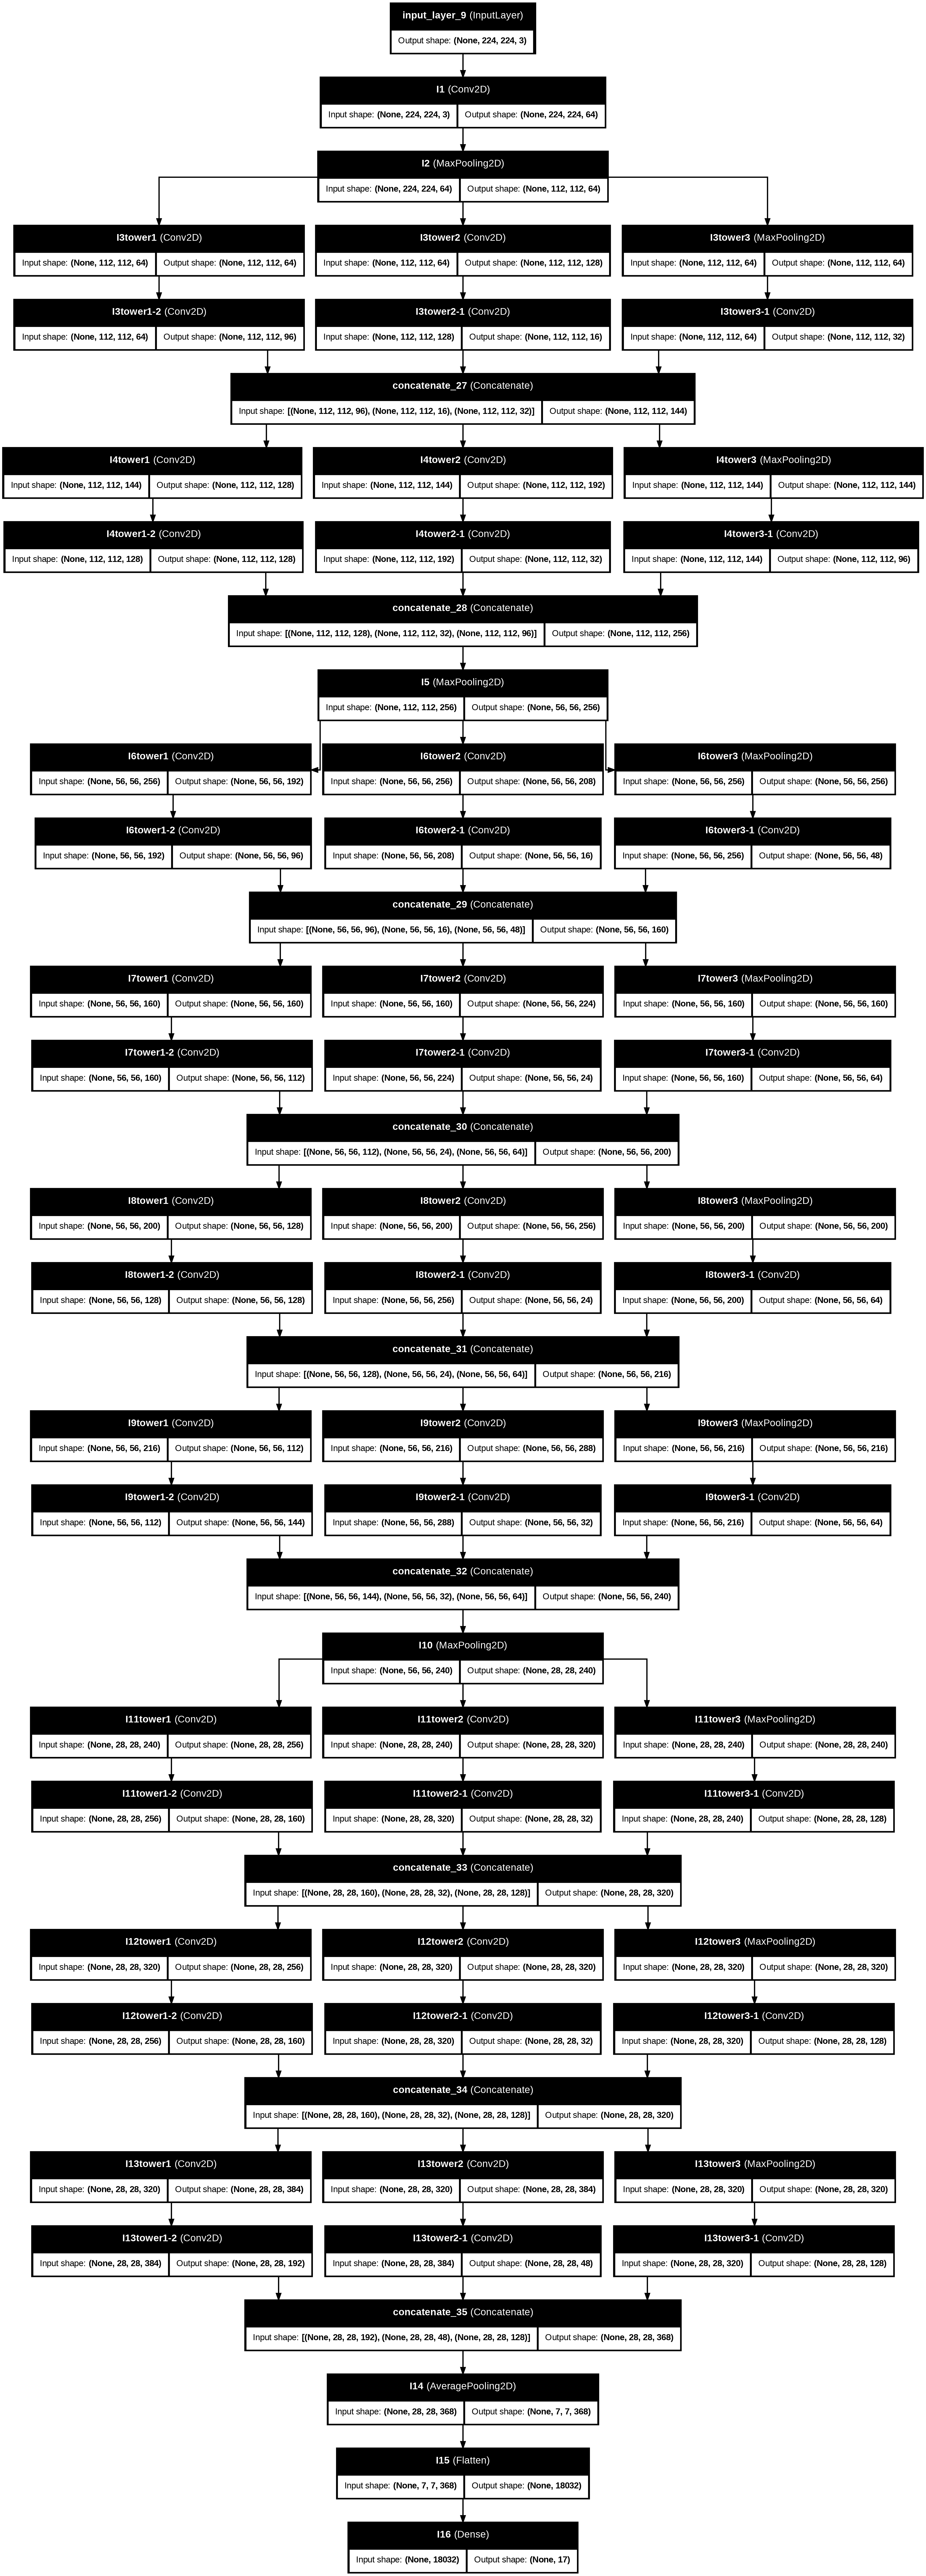

In [45]:
plot_model(m1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)